# 데이터 세트 소개

-  Olist Store 에서 이루어진 주문의 브라질 전자 상거래 공개 데이터 세트이다 .
- 이 데이터 세트는 **2016년부터 2018년까지 브라질의 여러 마켓플레이스에서 이루어진 10만 건의 주문 정보**가 있으나, 분석 과정에서는 3개월(9, 10, 12월)의 데이터만 존재하는 2016년은 제외하고 **2017년부터 분석**하였다.
> 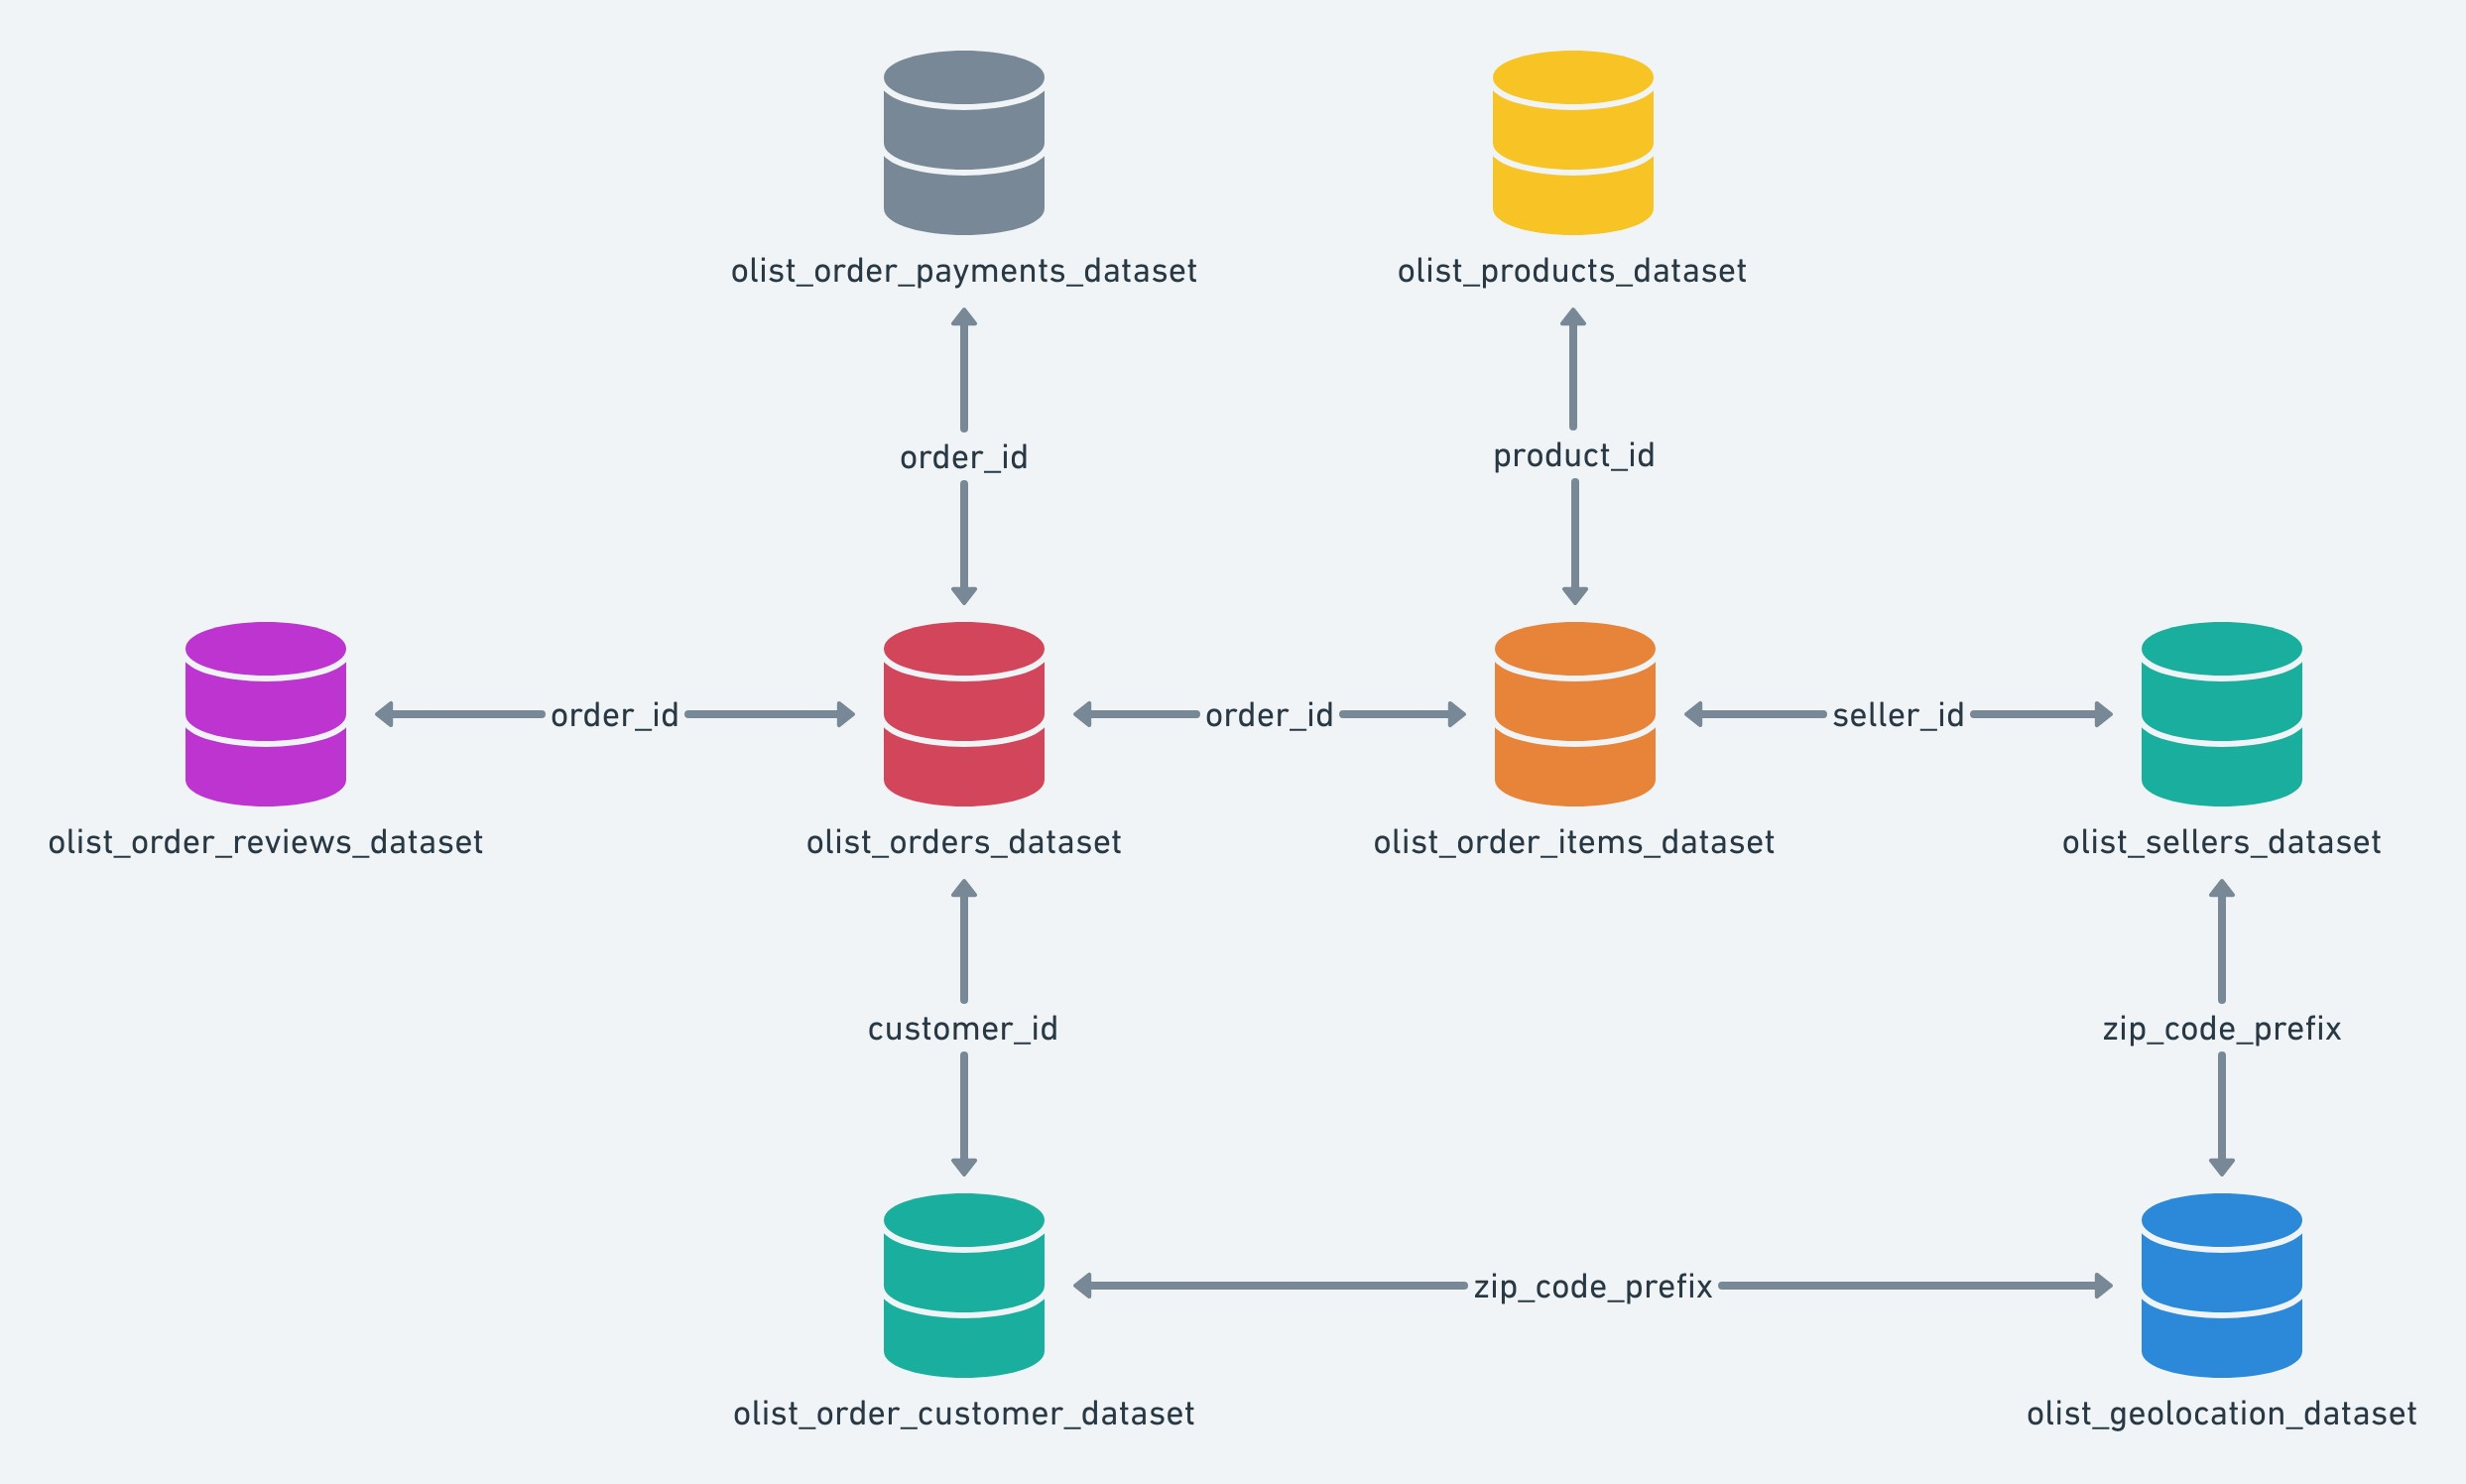
> - 출처: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

## Colab 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 라이브러리

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 프레젠테이션이나 보고서와 같은 다양한 매체에 활용할 수 있도록 스타일링
sns.set_context('notebook')

In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 데이터 확인

In [3]:
data_path = './drive/MyDrive/Datathon/archive'

In [4]:
paths = glob(f'{data_path}/*')
paths

['./drive/MyDrive/Datathon/archive/olist_customers_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_order_reviews_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_products_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_order_items_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_orders_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_sellers_dataset.csv',
 './drive/MyDrive/Datathon/archive/product_category_name_translation.csv',
 './drive/MyDrive/Datathon/archive/olist_geolocation_dataset.csv',
 './drive/MyDrive/Datathon/archive/olist_order_payments_dataset.csv']

In [5]:
# olist_customers_dataset.csv

customers = pd.read_csv(paths[0])
display(customers.shape, customers.head(2))

(99441, 5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
# olist_order_reviews_dataset.csv

reviews = pd.read_csv(paths[1])
display(reviews.shape, reviews.head(2))

(99224, 7)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [9]:
# olist_products_dataset.csv

products = pd.read_csv(paths[2])
display(products.shape, products.head(2))

(32951, 9)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
# olist_order_items_dataset.csv

order_items = pd.read_csv(paths[3])
display(order_items.shape, order_items.head(2))

(112650, 7)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [12]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
# olist_orders_dataset.csv

orders = pd.read_csv(paths[4])
display(orders.shape, orders.head(2))

(99441, 8)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
# olist_sellers_dataset.csv

sellers = pd.read_csv(paths[5])
display(sellers.shape, sellers.head(2))

(3095, 4)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [16]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:
# product_category_name_translation.csv

product_category_name = pd.read_csv(paths[6])
display(product_category_name.shape, product_category_name.head(2))

(71, 2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [18]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [19]:
# olist_geolocation_dataset.csv

geolocation = pd.read_csv(paths[7])
display(geolocation.shape, geolocation.head(2))

(1000163, 5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [20]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [21]:
# olist_order_payments_dataset.csv

order_payments = pd.read_csv(paths[8])
display(order_payments.shape, order_payments.head(2))

(103886, 5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [22]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


# 7개 데이터 하나로 merge

In [23]:
# ①orders에 ②customer 붙이기
df = orders.merge(customers, on = "customer_id", how = "outer")

# df에 ③payment 붙이기
df = df.merge(order_payments, on = "order_id", how = "outer")

# ④item과 ⑤products 붙이기
df = df.merge(order_items, on = "order_id", how = 'left')
df = df.merge(products, on = "product_id", how = 'outer')

# ⑥리뷰 붙이기
df = df.merge(reviews, on='order_id', how='outer')

# ⑦셀러 붙이기
df = df.merge(sellers, on='seller_id', how='outer')
df.shape

(119143, 39)

In [24]:
# 컬럼명 확인
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

## 브라질 주별 인구 수
- `브라질 주별 인구 수`를 검색한 결과, 데이터가 2011년과 2021년밖에 없어서 두 해의 인구 수에 대한 평균을 `브라질 주별 인구 수`로 적용하였다.

In [25]:
# 브라질 주(state) 확인
state_code = list(customers['customer_state'].unique())
state_code

['SP',
 'SC',
 'MG',
 'PR',
 'RJ',
 'RS',
 'PA',
 'GO',
 'ES',
 'BA',
 'MA',
 'MS',
 'CE',
 'DF',
 'RN',
 'PE',
 'MT',
 'AM',
 'AP',
 'AL',
 'RO',
 'PB',
 'TO',
 'PI',
 'AC',
 'SE',
 'RR']

- 브라질 주별 인구 데이터 가져오기
> - [State and Province Codes](https://www.ibm.com/support/pages/state-and-province-codes)
> - [brazil-population in 2011](https://knoema.com/uvabmyb/brazil-population)
> - [Population of Brazil in 2021, by state](https://www.statista.com/statistics/1182302/brazil-population-state/)

In [26]:
# 2011년 브라질 주별 인구 수
population_2011 = np.asarray([
    42168, 6439, 19962, 10633, 16332,
    10802, 7878, 6218, 3604, 14221,
    6772, 2528, 8671, 2681, 3252,
    8984, 3149, 3630, 711, 3184,
    1602, 3836, 1432, 3177, 769, 2129, 477]) * 1000

# 2021년 브라질 주별 인구 수
population_2021 = np.asarray([
    46649.13, 7338.47, 21411.92, 11597.48, 17463.35,
    11466.63, 8777.12, 7206.59, 4108.51, 14985.28,
    7153.26, 2839.19, 9240.58, 3094.33, 3560.9,
    9674.79, 3567.23, 4270, 877.61, 3365.35,
    1815.28, 4059.91, 1607.36, 3289.29, 906.88, 2338.47, 652.71]) * 1000

# 2011년과 2021년 두 해의 평균 인구 수
state_population = list((population_2011 + population_2021) / 2)
print(population_2011, '\n')
print(population_2021, '\n')
print(state_population)

[42168000  6439000 19962000 10633000 16332000 10802000  7878000  6218000
  3604000 14221000  6772000  2528000  8671000  2681000  3252000  8984000
  3149000  3630000   711000  3184000  1602000  3836000  1432000  3177000
   769000  2129000   477000] 

[46649130.  7338470. 21411920. 11597480. 17463350. 11466630.  8777120.
  7206590.  4108510. 14985280.  7153260.  2839190.  9240580.  3094330.
  3560900.  9674790.  3567230.  4270000.   877610.  3365350.  1815280.
  4059910.  1607360.  3289290.   906880.  2338470.   652710.] 

[44408565.0, 6888735.0, 20686960.0, 11115240.0, 16897675.0, 11134315.0, 8327560.0, 6712295.0, 3856255.0, 14603140.0, 6962630.0, 2683595.0, 8955790.0, 2887665.0, 3406450.0, 9329395.0, 3358115.0, 3950000.0, 794305.0, 3274675.0, 1708640.0, 3947955.0, 1519680.0, 3233145.0, 837940.0, 2233735.0, 564855.0]


In [27]:
# 브라질 주(state)와 인구 데이터를 딕셔너리 형태로 합치기
population_by_state = dict(zip(state_code, state_population))
population_by_state

{'SP': 44408565.0,
 'SC': 6888735.0,
 'MG': 20686960.0,
 'PR': 11115240.0,
 'RJ': 16897675.0,
 'RS': 11134315.0,
 'PA': 8327560.0,
 'GO': 6712295.0,
 'ES': 3856255.0,
 'BA': 14603140.0,
 'MA': 6962630.0,
 'MS': 2683595.0,
 'CE': 8955790.0,
 'DF': 2887665.0,
 'RN': 3406450.0,
 'PE': 9329395.0,
 'MT': 3358115.0,
 'AM': 3950000.0,
 'AP': 794305.0,
 'AL': 3274675.0,
 'RO': 1708640.0,
 'PB': 3947955.0,
 'TO': 1519680.0,
 'PI': 3233145.0,
 'AC': 837940.0,
 'SE': 2233735.0,
 'RR': 564855.0}

## 셀러 기준- 주별 판매 건수, 주별 판매금액 총합 비율 등

In [28]:
# 7개 데이터를 merge 한 df를 'seller_state' 컬럼 기준으로 그룹화 하고,
# 'order_id', 'seller_id', 'payment_value' 집계
df_sellers_by_state = df.groupby('seller_state')[
    ['order_id', 'seller_id', 'payment_value']
    ].agg({
        'order_id': 'nunique', 'seller_id': 'nunique', 'payment_value': 'sum'
        }).reset_index()

# 컬럼명 변경
df_sellers_by_state.columns = ['브라질 주', '판매 건수', '판매자 수', '총 매출']

# '주별 인구 수'라는 새로운 컬럼에 주별 인구 수 딕셔너리 값 넣기
df_sellers_by_state['주별 인구 수'] = df_sellers_by_state['브라질 주'].apply(
    lambda x: population_by_state[x])

# 브라질 전체 주(state)의 매출 합계 구하기
den = df_sellers_by_state['총 매출'].sum()
# 전체 매출에서 각 주별 '총 매출'이 차지하는 비율 구하기
df_sellers_by_state['주별 판매금액 총합 비율'] = df_sellers_by_state['총 매출'] / den * 100

df_sellers_by_state

,브라질 주,판매 건수,판매자 수,총 매출,주별 인구 수,주별 판매금액 총합 비율
0,AC,1,1,299.84,837940.0,0.001469
1,AM,3,1,1258.80,3950000.0,0.006165
2,BA,569,19,368177.86,14603140.0,1.803305
3,CE,91,13,25849.77,8955790.0,0.126610
4,DF,824,30,137899.29,2887665.0,0.675419
5,ES,318,23,78839.53,3856255.0,0.386149
6,GO,463,40,112290.09,6712295.0,0.549988
7,MA,392,1,52159.22,6962630.0,0.255472
8,MG,7930,244,1571008.90,20686960.0,7.694671
9,MS,49,5,10826.04,2683595.0,0.053025


In [29]:
palette = 'light:b_r'

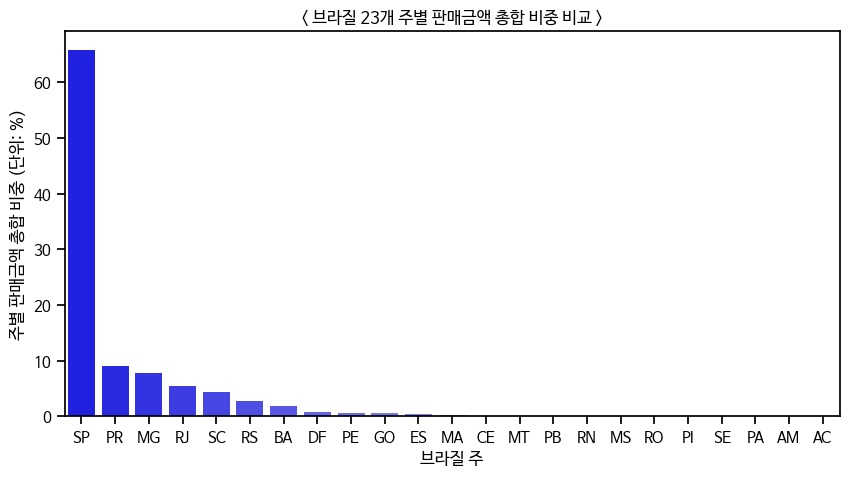

In [32]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(
    data=df_sellers_by_state.sort_values(by='주별 판매금액 총합 비율', ascending=False),
    x='브라질 주',
    y='주별 판매금액 총합 비율',
    palette=palette,
)
ax.set_title('< 브라질 23개 주별 판매금액 총합 비중 비교 >')
ax.set_ylabel('주별 판매금액 총합 비중 (단위: %)');

## 고객 기준- 주별 구매 건수, 주별 구매금액 총합 비율 등

In [33]:
# 7개 데이터를 merge 한 df를 'customer_state' 컬럼 기준으로 그룹화 하고,
# 'order_id', 'customer_unique_id'', 'payment_value' 집계
df_customers_by_state = df.groupby('customer_state')[
    ['order_id', 'customer_unique_id', 'payment_value']
    ].agg({
        'order_id': 'nunique', 'customer_unique_id': 'nunique', 'payment_value': 'sum'
        }).reset_index()

# 컬럼명 변경
df_customers_by_state.columns = ['브라질 주', '구매 건수', '구매자 수', '총 매출']

# '주별 인구 수'라는 새로운 컬럼에 주별 인구 수 딕셔너리 값 넣기
df_customers_by_state['주별 인구 수'] = df_customers_by_state['브라질 주'].apply(
    lambda x: population_by_state[x])

# 브라질 전체 주(state)의 매출 합계 구하기
den = df_customers_by_state['총 매출'].sum()
# 전체 매출에서 각 주별 '총 매출'이 차지하는 비율 구하기
df_customers_by_state['주별 구매금액 총합 비율'] = df_customers_by_state['총 매출'] / den * 100

df_customers_by_state

,브라질 주,구매 건수,구매자 수,총 매출,주별 인구 수,주별 구매금액 총합 비율
0,AC,81,77,24984.86,837940.0,0.121406
1,AL,413,401,112296.47,3274675.0,0.545667
2,AM,148,143,34956.93,3950000.0,0.169862
3,AP,68,67,21642.70,794305.0,0.105165
4,BA,3380,3277,805070.98,14603140.0,3.911973
5,CE,1336,1313,349290.36,8955790.0,1.697260
6,DF,2140,2075,438095.32,2887665.0,2.128778
7,ES,2033,1964,408611.64,3856255.0,1.985512
8,GO,2020,1952,520481.65,6712295.0,2.529107
9,MA,747,726,200363.24,6962630.0,0.973598


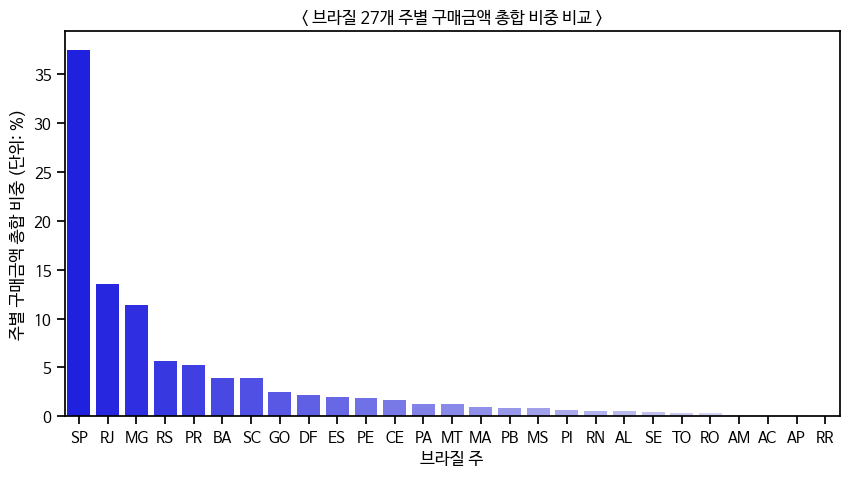

In [34]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.barplot(
    data=df_customers_by_state.sort_values(by='주별 구매금액 총합 비율', ascending=False),
    x='브라질 주',
    y='주별 구매금액 총합 비율',
    palette=palette,
)
ax.set_title('< 브라질 27개 주별 구매금액 총합 비중 비교 >')
ax.set_ylabel('주별 구매금액 총합 비중 (단위: %)');

## 고객 기준- 주별 주문 수, 매출, 리뷰 평점, 인구 수 등

In [35]:
# 7개 데이터를 merge 한 df를 'customer_state' 컬럼 기준으로 그룹화 하고,
# 'order_id', 'customer_unique_id'', 'payment_value', 'review_score' 집계
df_activity_by_state = df.groupby('customer_state')[
    ['order_id', 'customer_unique_id', 'payment_value', 'review_score']
    ].agg({'order_id': 'nunique', 'customer_unique_id': 'nunique',
           'payment_value': 'sum', 'review_score': 'mean'
           }).reset_index()

# 컬럼명 변경
df_activity_by_state.columns = ['브라질 주', '주문 건수', '주문 고객 수',
                                '총 매출', '리뷰 평균 점수']

# '고객당 평균 매출' 컬럼 만들기
df_activity_by_state['고객당 평균 매출'] = \
    df_activity_by_state['총 매출'] / df_activity_by_state['주문 고객 수']

# '주별 인구 수'라는 새로운 컬럼에 주별 인구 수 딕셔너리 값 넣기
df_activity_by_state['주별 인구 수'] = \
    df_activity_by_state['브라질 주'].apply(lambda x: population_by_state[x])

# 만 명 기준으로 잡기 위해 1e4 곱함
# 지수 표현(지수형을 사용하여 긴 값을 짧게 표현) : 1e4 == 10000.0 / 1e4 == 10000
df_activity_by_state['주별 인구 대비 주문 밀도'] = \
    df_activity_by_state['주문 건수'] / df_activity_by_state['주별 인구 수'] * 1e4

df_activity_by_state

,브라질 주,주문 건수,주문 고객 수,총 매출,리뷰 평균 점수,고객당 평균 매출,주별 인구 수,주별 인구 대비 주문 밀도
0,AC,81,77,24984.86,4.094737,324.478701,837940.0,0.966656
1,AL,413,401,112296.47,3.715835,280.041072,3274675.0,1.261194
2,AM,148,143,34956.93,4.070175,244.454056,3950000.0,0.374684
3,AP,68,67,21642.70,4.240964,323.025373,794305.0,0.856094
4,BA,3380,3277,805070.98,3.807235,245.673171,14603140.0,2.314571
5,CE,1336,1313,349290.36,3.810167,266.024646,8955790.0,1.491772
6,DF,2140,2075,438095.32,3.987981,211.130275,2887665.0,7.410832
7,ES,2033,1964,408611.64,3.974656,208.050733,3856255.0,5.271954
8,GO,2020,1952,520481.65,3.975710,266.640190,6712295.0,3.009403
9,MA,747,726,200363.24,3.670588,275.982424,6962630.0,1.072870


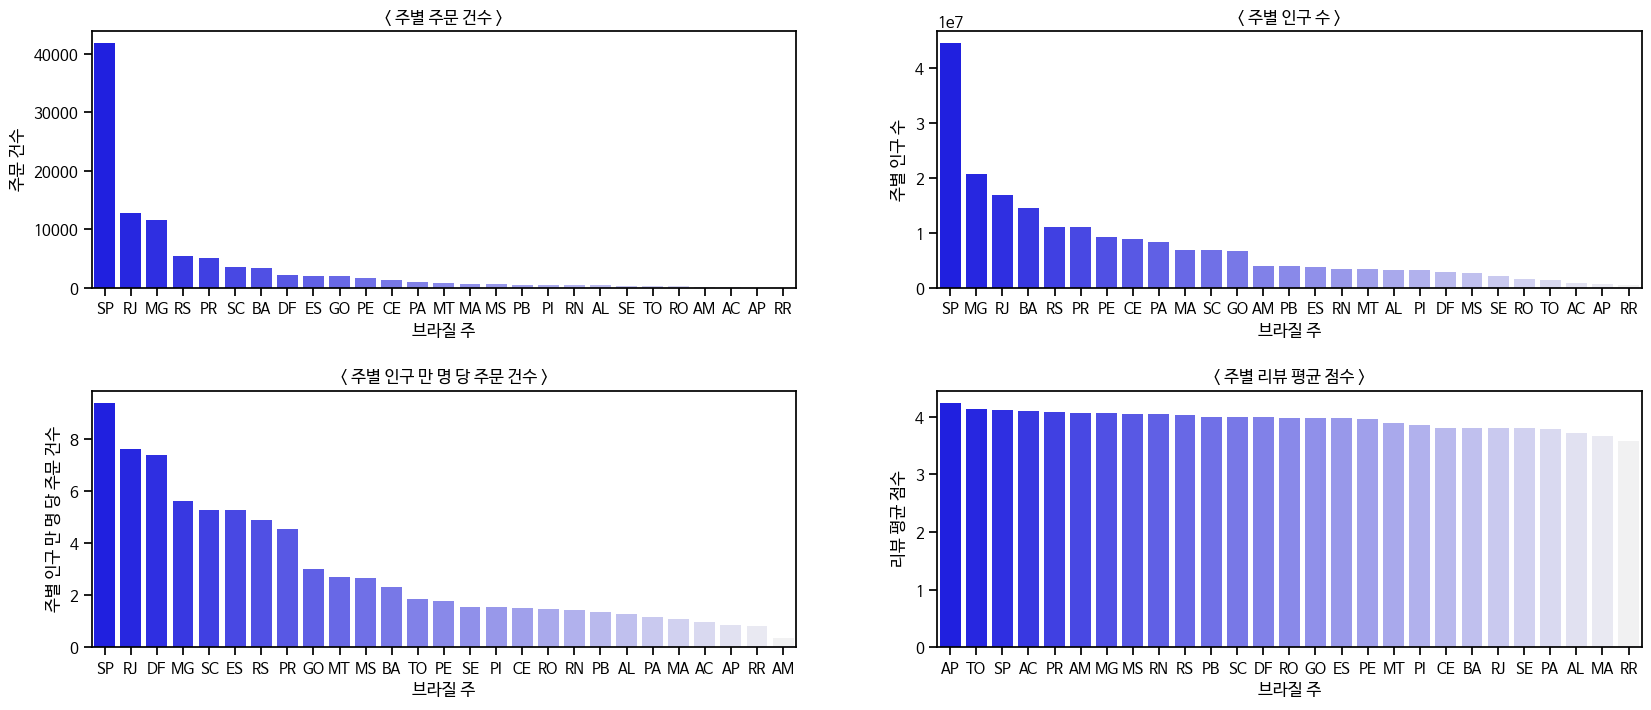

In [36]:
_, axes = plt.subplots(2, 2, figsize=(20, 8)) # nrows=2, ncols=2

# 그래프 간 겹치지 않게 조절
_.subplots_adjust(hspace=0.4)

sns.barplot(
    data=df_activity_by_state.sort_values(by='주문 건수', ascending=False),
    x='브라질 주',
    y='주문 건수',
    ax=axes[0][0],
    palette=palette,
)
axes[0][0].set_title('< 주별 주문 건수 >');

sns.barplot(
    data=df_activity_by_state.sort_values(by='주별 인구 수', ascending=False),
    x='브라질 주',
    y='주별 인구 수',
    ax=axes[0][1],
    palette=palette,
)
axes[0][1].set_title('< 주별 인구 수 >');

sns.barplot(
    data=df_activity_by_state.sort_values(by='주별 인구 대비 주문 밀도', ascending=False),
    x='브라질 주',
    y='주별 인구 대비 주문 밀도',
    ax=axes[1][0],
    palette=palette,
)
axes[1][0].set_title('< 주별 인구 만 명 당 주문 건수 >')
axes[1][0].set_ylabel('주별 인구 만 명 당 주문 건수');

sns.barplot(
    data=df_activity_by_state.sort_values(by='리뷰 평균 점수', ascending=False),
    x='브라질 주',
    y='리뷰 평균 점수',
    ax=axes[1][1],
    palette=palette,
)
axes[1][1].set_title('< 주별 리뷰 평균 점수 >');

# 5개 지역(region)별 분석

## 주문 수, 매출, 리뷰 평점, 인구 수 등

In [37]:
# Set regions
southeast = ['SP', 'RJ', 'MG', 'ES']
south = ['RS', 'SC', 'PR']
central_west = ['DF', 'GO', 'MS', 'MT']
northeast = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
north = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']

df.loc[df['customer_state'].isin(southeast), 'custom_region'] = 'Southeast'
df.loc[df['customer_state'].isin(south), 'custom_region'] = 'South'
df.loc[df['customer_state'].isin(central_west), 'custom_region'] = 'Central-west'
df.loc[df['customer_state'].isin(northeast), 'custom_region'] = 'Northeast'
df.loc[df['customer_state'].isin(north), 'custom_region'] = 'North'

df['custom_region'].value_counts()

Southeast       81962
South           16961
Northeast       11079
Central-west     6976
North            2165
Name: custom_region, dtype: int64

In [38]:
# 5개 지역의 인구 수
population_by_region = {
    'Southeast': 0,
    'South': 0,
    'Central-west': 0,
    'Northeast': 0,
    'North': 0,
}

for state in southeast:
    population_by_region['Southeast'] += population_by_state[state]
for state in south:
    population_by_region['South'] += population_by_state[state]
for state in central_west:
    population_by_region['Central-west'] += population_by_state[state]
for state in northeast:
    population_by_region['Northeast'] += population_by_state[state]
for state in north:
    population_by_region['North'] += population_by_state[state]

population_by_region

{'Southeast': 85849455.0,
 'South': 29138290.0,
 'Central-west': 15641670.0,
 'Northeast': 55946915.0,
 'North': 17702980.0}

In [39]:
# 5개 'custom_region' 컬럼 기준으로 그룹화 하고,
# 'order_id', 'customer_unique_id'', 'seller_id', 'payment_value', 'review_score' 집계
df_activity_by_region = df.groupby('custom_region')[
    ['order_id', 'customer_unique_id', 'seller_id', 'payment_value', 'review_score']
    ].agg({'order_id': 'nunique', 'customer_unique_id': 'nunique',
           'seller_id': 'nunique', 'payment_value': 'sum', 'review_score': 'mean'}).reset_index()

# 컬럼명 변경
df_activity_by_region.columns = [
    '브라질 5개 지역', '주문 건수', '구매 고객 수', '판매자 수',
    '총 매출', '리뷰 평균 점수']

# 지역(region)별 '고객당 평균 매출' 컬럼 만들기
df_activity_by_region['고객당 평균 매출'] = \
    df_activity_by_region['총 매출'] / df_activity_by_region['구매 고객 수']

# '5개 지역별 인구 수'라는 새로운 컬럼에 지역별 인구 수 딕셔너리 값 넣기
df_activity_by_region['5개 지역별 인구 수'] = \
    df_activity_by_region['브라질 5개 지역'].apply(lambda x: population_by_region[x])

# 만 명 기준으로 잡기 위해 1e4 곱함
# 지수 표현(지수형을 사용하여 긴 값을 짧게 표현) : 1e4 == 10000.0 / 1e4 == 10000
df_activity_by_region['5개 지역별 인구 대비 주문 건수'] = \
    df_activity_by_region['주문 건수'] / df_activity_by_region['5개 지역별 인구 수'] * 1e4

df_activity_by_region

,브라질 5개 지역,주문 건수,구매 고객 수,판매자 수,총 매출,리뷰 평균 점수,고객당 평균 매출,5개 지역별 인구 수,5개 지역별 인구 대비 주문 건수
0,Central-west,5782,5595,1269,1384049.50,3.976108,247.372565,15641670.0,3.696536
1,North,1851,1794,709,498860.96,3.917251,278.071884,17702980.0,1.045587
2,Northeast,9394,9140,1473,2373979.20,3.843984,259.735142,55946915.0,1.679092
3,South,14148,13690,1836,3041247.60,4.038765,222.151030,29138290.0,4.855467
4,Southeast,68266,65900,2857,13281526.75,4.039840,201.540618,85849455.0,7.951827


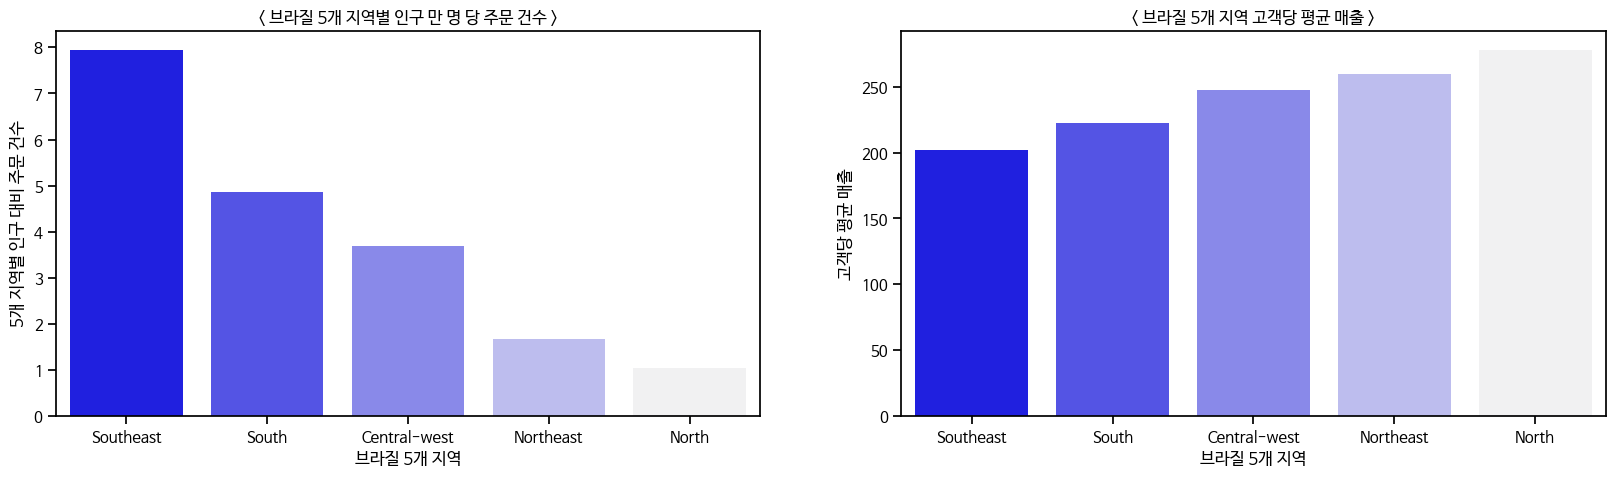

In [40]:
_, axes = plt.subplots(1, 2, figsize=(20, 5)) # nrows=1, ncols=2

sns.barplot(
    data=df_activity_by_region.sort_values(
        by='5개 지역별 인구 대비 주문 건수', ascending=False),
    x='브라질 5개 지역',
    y='5개 지역별 인구 대비 주문 건수',
    palette=palette,
    ax=axes[0],
    )

axes[0].set_title('< 브라질 5개 지역별 인구 만 명 당 주문 건수 >')
axes[0].set_ylabel('5개 지역별 인구 대비 주문 건수')

sns.barplot(
    data=df_activity_by_region.sort_values(
        by='5개 지역별 인구 대비 주문 건수', ascending=False),
    x='브라질 5개 지역',
    y='고객당 평균 매출',
    palette=palette,
    ax=axes[1])

axes[1].set_title('< 브라질 5개 지역 고객당 평균 매출 >')
axes[1].set_ylabel('고객당 평균 매출');

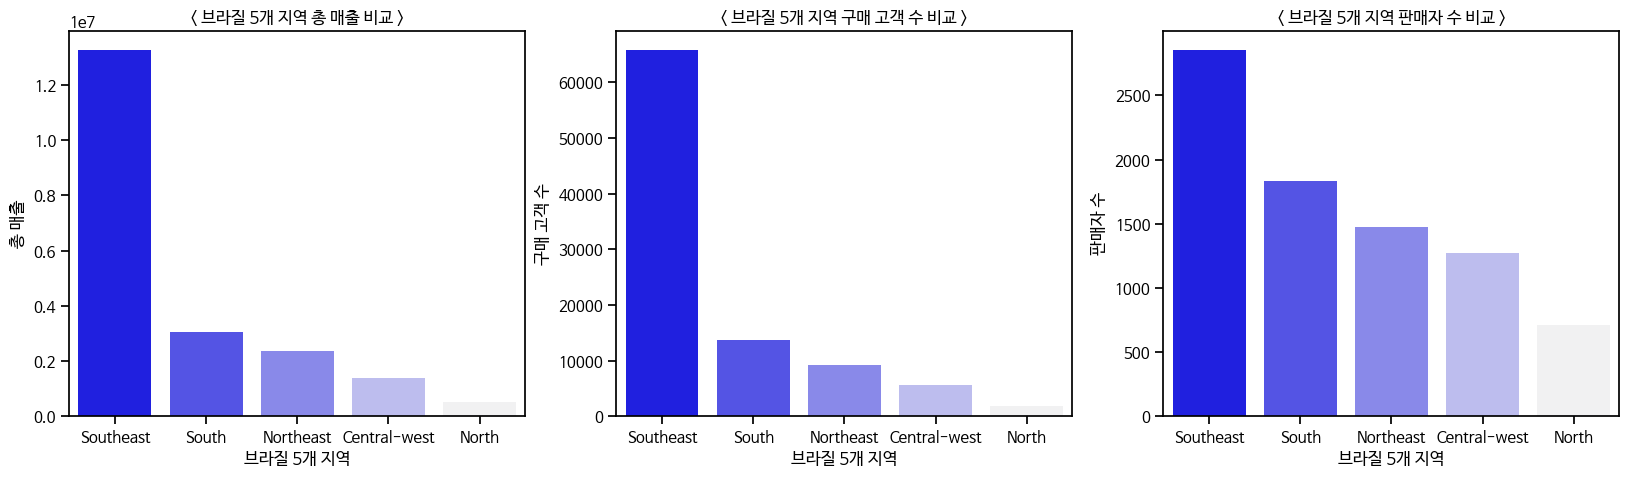

In [41]:
_, axes = plt.subplots(1, 3, figsize=(20, 5)) # nrows=1, ncols=2

sns.barplot(
    data=df_activity_by_region.sort_values(
        by='총 매출', ascending=False),
    x='브라질 5개 지역',
    y='총 매출',
    palette=palette,
    ax=axes[0]
)
axes[0].set_title('< 브라질 5개 지역 총 매출 비교 >')
axes[0].set_ylabel('총 매출')

sns.barplot(
    data=df_activity_by_region.sort_values(
        by='구매 고객 수', ascending=False),
    x='브라질 5개 지역',
    y='구매 고객 수',
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('< 브라질 5개 지역 구매 고객 수 비교 >')
axes[1].set_ylabel('구매 고객 수')

sns.barplot(
    data=df_activity_by_region.sort_values(
        by='판매자 수', ascending=False),
    x='브라질 5개 지역',
    y='판매자 수',
    palette=palette,
    ax=axes[2]
)
axes[2].set_title('< 브라질 5개 지역 판매자 수 비교 >')
axes[2].set_ylabel('판매자 수');

# MAU(Monthly Active User) 분석
- `월별 활동한 이용자`를 '월별 구매 건수'와 '월별 승인 건수'로 학인하였다.

In [42]:
# 날짜 컬럼을 datetime 형으로 변환
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_approved_at"] = pd.to_datetime(df["order_approved_at"])
df["order_delivered_carrier_date"] = pd.to_datetime(df["order_delivered_carrier_date"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

In [43]:
# purchase YM, approved YM 파생 변수 생성
df["purchase_YM"] = df["order_purchase_timestamp"].astype(str).str[:7]
df["approved_YM"] = df["order_approved_at"].astype(str).str[:7]

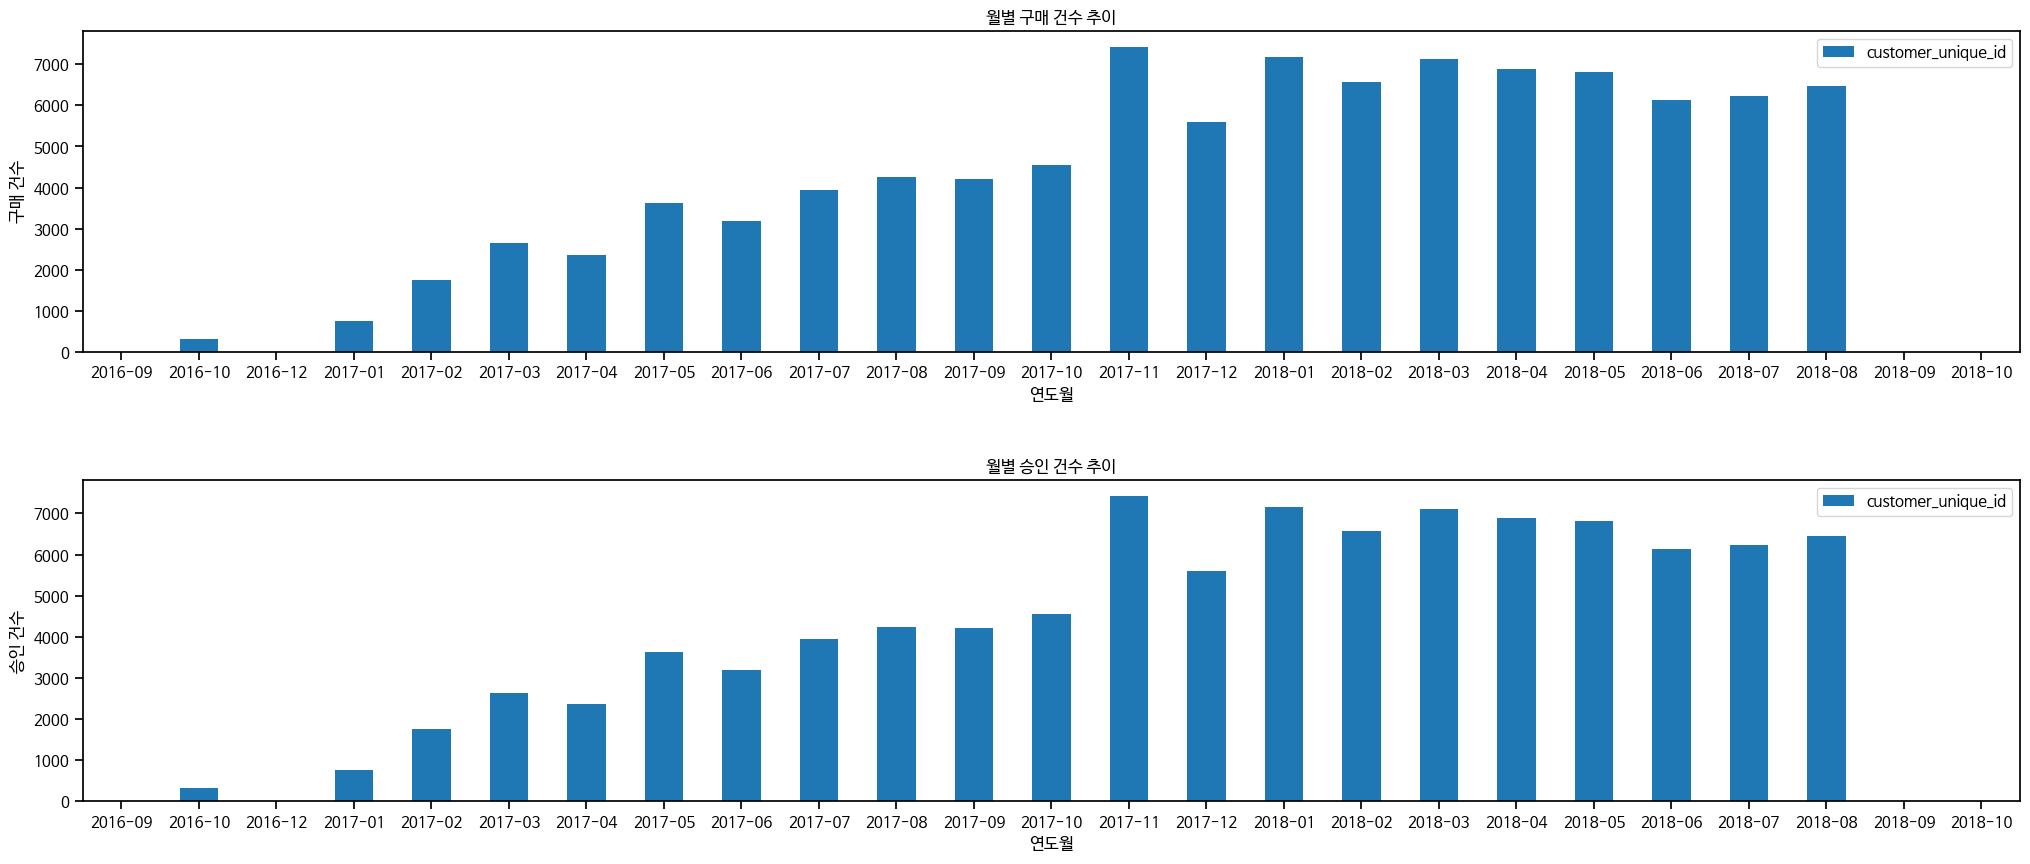

In [44]:
_, axes = plt.subplots(2, 1, figsize=(25,10)) # nrows=2, ncols=1

# 그래프 간 겹치지 않게 조절
_.subplots_adjust(hspace=0.4)

# MAU - purchase
purchase_mau = df.groupby(by='purchase_YM').agg({
    'customer_unique_id': 'nunique'})

purchase_mau.plot.bar(
    rot=0,
    title="월별 구매 건수 추이",
    xlabel='연도월',
    ylabel='구매 건수',
    ax=axes[0]
)

# MAU - approved
approved_mau = df.groupby(by='approved_YM').agg({
    'customer_unique_id': 'nunique'})

purchase_mau.plot.bar(
    rot=0,
    title="월별 승인 건수 추이",
    xlabel='연도월',
    ylabel='승인 건수',
    ax=axes[1]
);

# Monthly revenue
- 2016년 9월과 12월, 2018년 9월과 10월은 각각의 한달을 대표하지 못한다. (특히, 2018년 9월은 데이터 원본이 9월 중간까지 존재)
- 그래서 2017년 1월부터 2018년 8월까지의 매출 추이를 파악하였다.

In [45]:
monthly_revenue = df.groupby(by='purchase_YM').agg({'payment_value': 'sum'})

monthly_revenue

,payment_value
purchase_YM,
2016-09,388.47
2016-10,76559.05
2016-12,19.62
2017-01,190806.27
2017-02,351848.13
2017-03,547769.84
2017-04,512126.52
2017-05,737425.31
2017-06,613777.41


In [46]:
# 2017-01 매출액
monthly_revenue.iloc[3].item()

190806.27

In [47]:
# 2018-01 매출액
monthly_revenue.iloc[15].item()

1425461.4

In [48]:
# 2018-08 매출액
monthly_revenue.iloc[-3].item()

1248942.63

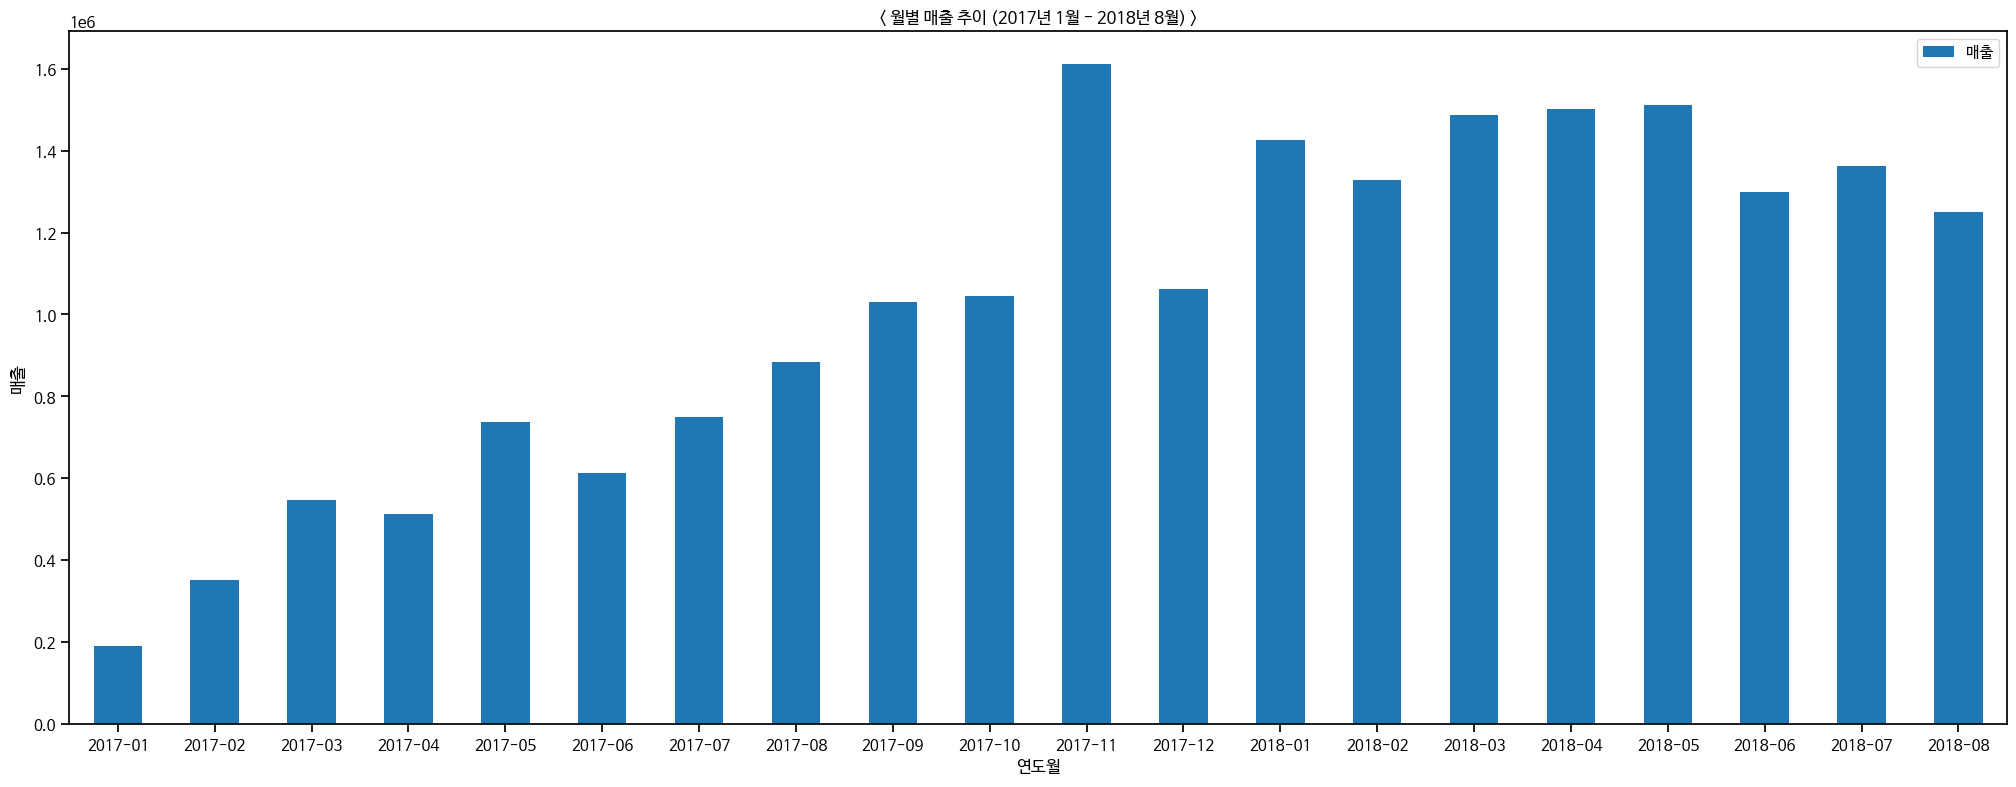

In [49]:
_, ax = plt.subplots(1, 1, figsize=(25, 9))

monthly_revenue[3:-2].plot.bar(
    rot=0,
    title="< 월별 매출 추이 (2017년 1월 - 2018년 8월) >",
    xlabel='연도월',
    ylabel='매출',
    ax=ax,
)

# 범례 표시
ax.legend(['매출'], loc='upper right');

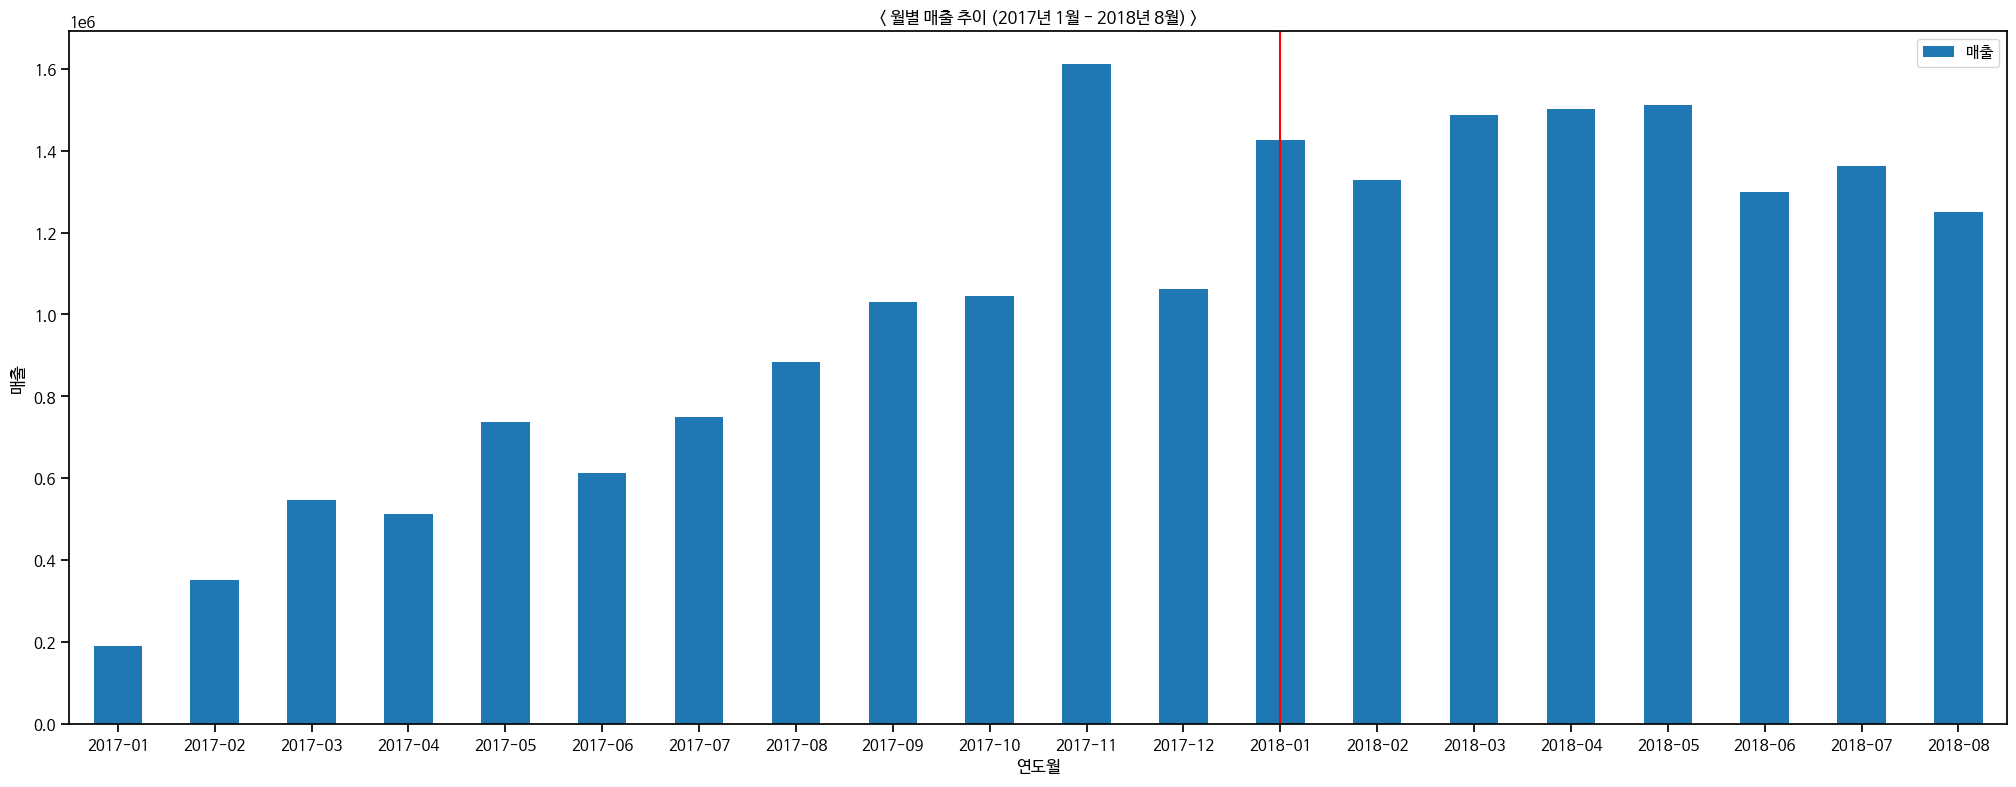

In [52]:
_, ax = plt.subplots(1, 1, figsize=(25, 9))

monthly_revenue[3:-2].plot.bar(
    rot=0,
    title="< 월별 매출 추이 (2017년 1월 - 2018년 8월) >",
    xlabel='연도월',
    ylabel='매출',
    ax=ax,
)

# 범례 표시
ax.legend(['매출'], loc='upper right')

# 2018년 기준선
# 2018년 이전 매출 오름세가 2018년 이후 정체한다는 것을 보여주기 위함
ax.axvline(x=12, color='r');